In [3]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import csv
import itertools
import matplotlib.pyplot as plt
import pandas as pd

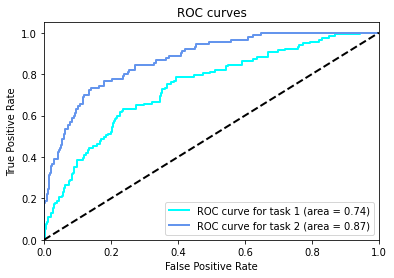

Category 1 Score: 74.023
Category 2 Score: 87.183
Category 3 Score: 80.603


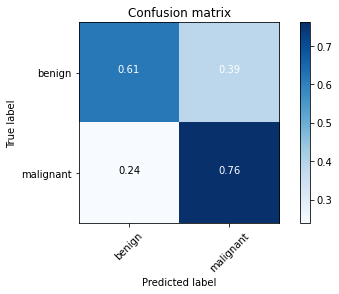

In [13]:
def plot_roc_auc(y_true,y_pred):
    fpr = dict()
    tpr = dict()

    roc_auc = np.zeros(3)
    
    
    #prepare for figure
    plt.figure()
    colors = ['aqua','cornflowerblue']
    
    
    #for both classification tasks
    for i in range(2):
        
        #obtain roc curve
        fpr[i],tpr[i],_=roc_curve(y_true[:,i],y_pred[:,i])
        
        #obtian roc auc
        roc_auc[i] = auc(fpr[i],tpr[i])
        
        #plot roc curve
        plt.plot(fpr[i],tpr[i],color=colors[i],lw=2,label='ROC curve for task {d} (area = {f:.2f})'.format(d=i+1, f=roc_auc[i]))

        #get score for category 3
    roc_auc[2] = np.average(roc_auc[:2])
    #format figure
    plt.plot([0,1],[0,1],'k--',lw=2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves')
    plt.legend(loc="lower right")
    plt.show()
    #print scores
    for i in range(3):
        print('Category {d} Score: {f:.3f}'. format(d=i+1, f=roc_auc[i]*100))
def plot_confusion_matrix(y_true,y_pred,thresh,classes):
    #obtain class predictions from probabilites
    y_pred = (y_pred>=thresh)*1
    
    #obtain unnormalized confusion matrix
    cm = confusion_matrix(y_true,y_pred)
    
    #normalize confusion matrix
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() /2.
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], '.2f')
                ,horizontalalignment="center",
                color="white"if cm[i,j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
preds_path = 'my_transfer.csv'
thresh= 0.2
#get ground truth labels 
truth = pd.read_csv('ground_truth.csv')
y_true = truth[["task_1","task_2"]].values

# get model predictions 
y_pred = pd.read_csv('my_transfer.csv')
y_pred = y_pred[["task_1","task_2"]].values
#plot ROC curves and print scors 
plot_roc_auc(y_true,y_pred)
#plot confusion matrix
classes = ['benign','malignant']
plot_confusion_matrix(y_true[:,0], y_pred[:,0],thresh,classes)
